To test:
* optimizers: Adam, AdamW
* learning rate schedulers: StepLR, CosineAnnealingLR
* more epochs
* pos embedding
* dropout
* more heads

In [1]:
import sys

sys.path.append("./../../src")

from Dataset import SpeechCommandsDataset
from torch.utils.data import DataLoader, SubsetRandomSampler, Subset
from Transformer import (
    SpeechCommandTransformer,
    train_transformer,
    calculate_class_weights,
    plot_confusion_matrix,
    plot_accuracy_loss,
    set_seed,
)
import torch
from torch.optim import AdamW
import torch.nn as nn

torch.cuda.empty_cache()
set_seed(213)

In [2]:
train_dataset = SpeechCommandsDataset("../../data/train", mode="modified")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=6)

test_dataset = SpeechCommandsDataset("../../data/test", mode="modified")
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=6)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class_weights = calculate_class_weights(train_dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

Epoch [1/20], Train Loss: 2.4233, Train Accuracy: 9.70, Test Accuracy: 62.56%


Epoch [2/20], Train Loss: 2.4634, Train Accuracy: 9.21, Test Accuracy: 3.50%


Epoch [3/20], Train Loss: 2.4895, Train Accuracy: 12.24, Test Accuracy: 3.68%


Epoch [4/20], Train Loss: 2.4876, Train Accuracy: 15.35, Test Accuracy: 3.87%


Epoch [5/20], Train Loss: 2.4875, Train Accuracy: 29.11, Test Accuracy: 3.68%


Epoch [6/20], Train Loss: 2.4867, Train Accuracy: 27.97, Test Accuracy: 2.77%


Epoch [7/20], Train Loss: 2.4866, Train Accuracy: 31.10, Test Accuracy: 60.71%


Epoch [8/20], Train Loss: 2.4860, Train Accuracy: 36.05, Test Accuracy: 3.73%


Epoch [9/20], Train Loss: 2.4873, Train Accuracy: 34.23, Test Accuracy: 60.71%


Epoch [10/20], Train Loss: 2.4856, Train Accuracy: 36.16, Test Accuracy: 60.71%


Epoch [11/20], Train Loss: 2.4850, Train Accuracy: 60.38, Test Accuracy: 60.71%


Epoch [12/20], Train Loss: 2.4850, Train Accuracy: 61.64, Test Accuracy: 60.71%
Early stopping at epoch 12
Best Test Accuracy: 60.71%, Best Train Accuracy: 34.23%


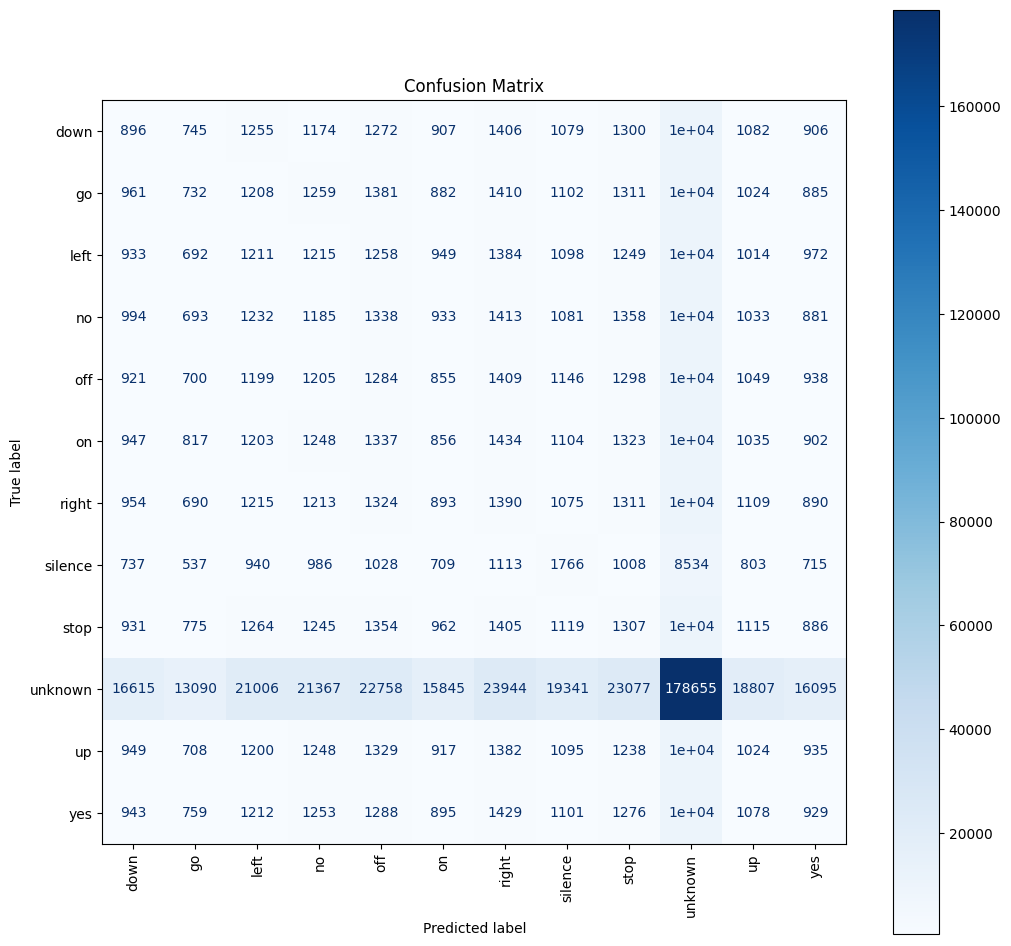

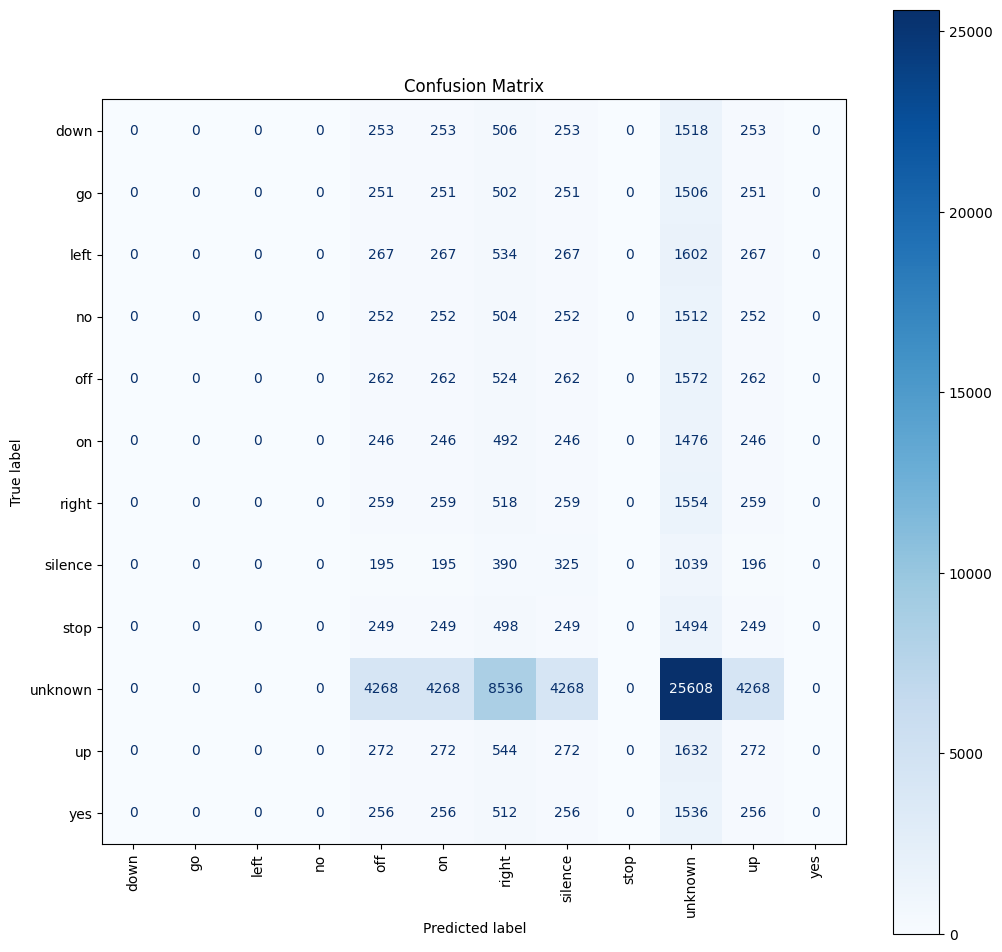

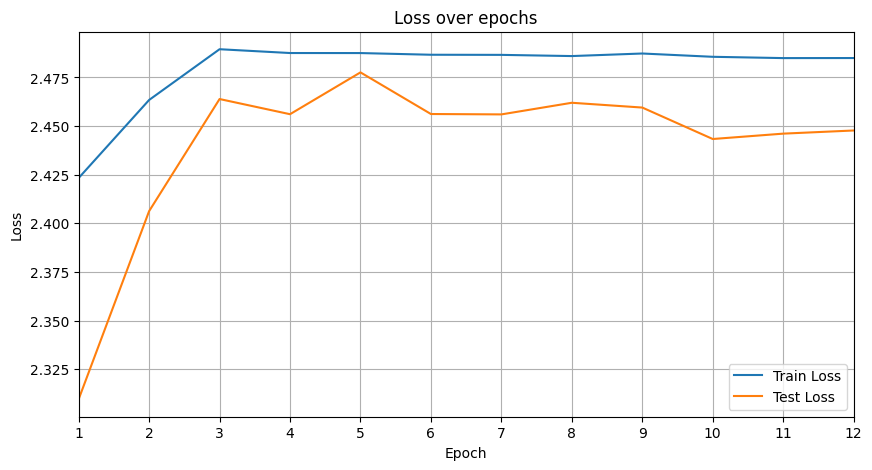

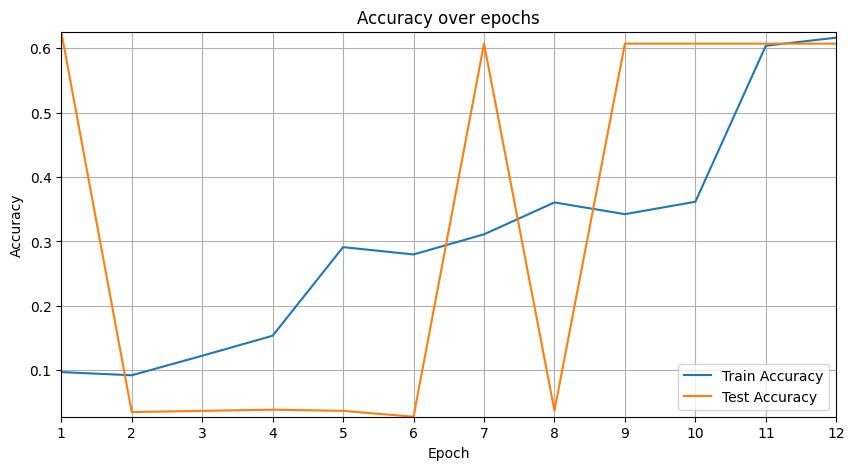

In [3]:
model = SpeechCommandTransformer(
    num_classes=len(train_dataset.class_to_idx), embed_dim=128, device=device, stride=1
).to(device)

(
    train_losses,
    train_accuracies,
    test_losses,
    test_accuracies,
    train_true_labels,
    train_pred_labels,
    test_true_labels,
    test_pred_labels,
) = train_transformer(
    train_loader,
    test_loader,
    model=model,
    num_epochs=20,
    device=device,
    criterion=criterion,
)
plot_confusion_matrix(
    train_true_labels, train_pred_labels, train_dataset, normalize=False
)
plot_confusion_matrix(
    test_true_labels, test_pred_labels, train_dataset, normalize=False
)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [4]:
model = SpeechCommandTransformer(
    num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device, stride=1
).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(
    train_losses,
    train_accuracies,
    test_losses,
    test_accuracies,
    train_true_labels,
    train_pred_labels,
    test_true_labels,
    test_pred_labels,
) = train_transformer(
    train_loader,
    test_loader,
    model=model,
    num_epochs=20,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
)

OutOfMemoryError: CUDA out of memory. Tried to allocate 608.00 MiB. GPU 0 has a total capacity of 11.69 GiB of which 366.50 MiB is free. Including non-PyTorch memory, this process has 10.39 GiB memory in use. Of the allocated memory 9.72 GiB is allocated by PyTorch, and 442.64 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
plot_confusion_matrix(
    train_true_labels, train_pred_labels, train_dataset, normalize=False
)
plot_confusion_matrix(
    test_true_labels, test_pred_labels, train_dataset, normalize=False
)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(
    num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device, stride=1
).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(
    train_losses,
    train_accuracies,
    test_losses,
    test_accuracies,
    train_true_labels,
    train_pred_labels,
    test_true_labels,
    test_pred_labels,
) = train_transformer(
    train_loader,
    test_loader,
    model=model,
    num_epochs=20,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
    scheduling=False,
)

In [ ]:
plot_confusion_matrix(
    train_true_labels, train_pred_labels, train_dataset, normalize=False
)
plot_confusion_matrix(
    test_true_labels, test_pred_labels, train_dataset, normalize=False
)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(
    num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device, stride=1
).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(
    train_losses,
    train_accuracies,
    test_losses,
    test_accuracies,
    train_true_labels,
    train_pred_labels,
    test_true_labels,
    test_pred_labels,
) = train_transformer(
    train_loader,
    test_loader,
    model=model,
    num_epochs=20,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
    scheduling=False,
)

In [ ]:
plot_confusion_matrix(
    train_true_labels, train_pred_labels, train_dataset, normalize=False
)
plot_confusion_matrix(
    test_true_labels, test_pred_labels, train_dataset, normalize=False
)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(
    num_classes=len(train_dataset.class_to_idx),
    embed_dim=256,
    device=device,
    stride=1,
    pos_embedding=True,
).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(
    train_losses,
    train_accuracies,
    test_losses,
    test_accuracies,
    train_true_labels,
    train_pred_labels,
    test_true_labels,
    test_pred_labels,
) = train_transformer(
    train_loader,
    test_loader,
    model=model,
    num_epochs=20,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
    scheduling=False,
)

In [ ]:
plot_confusion_matrix(
    train_true_labels, train_pred_labels, train_dataset, normalize=False
)
plot_confusion_matrix(
    test_true_labels, test_pred_labels, train_dataset, normalize=False
)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [2]:
import sys

sys.path.append("./../../src")

from Dataset import SpeechCommandsDataset
from torch.utils.data import DataLoader
from Transformer import SpeechCommandTransformer, train_transformer
import torch
from torch.optim import AdamW
from torchinfo import summary

train_dataset = SpeechCommandsDataset("../../data/train", mode="modified")
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=6)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SpeechCommandTransformer(
    num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device, stride=1
).to(device)
summary(model, input_size=(16, 16000))

Layer (type:depth-idx)                        Output Shape              Param #
SpeechCommandTransformer                      [16, 12]                  256
├─MelSpectrogram: 1-1                         [16, 64, 101]             --
│    └─Spectrogram: 2-1                       [16, 201, 101]            --
│    └─MelScale: 2-2                          [16, 64, 101]             --
├─AmplitudeToDB: 1-2                          [16, 64, 101]             --
├─Sequential: 1-3                             [16, 64, 64, 101]         --
│    └─Conv2d: 2-3                            [16, 32, 64, 101]         320
│    └─BatchNorm2d: 2-4                       [16, 32, 64, 101]         64
│    └─ReLU: 2-5                              [16, 32, 64, 101]         --
│    └─Conv2d: 2-6                            [16, 64, 64, 101]         18,496
│    └─BatchNorm2d: 2-7                       [16, 64, 64, 101]         128
│    └─ReLU: 2-8                              [16, 64, 64, 101]         --
├─Linear: 1-4